<a href="https://colab.research.google.com/github/igomezv/DataScienceIntermedio/blob/main/Practica2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica de análisis de datos

Vamos a utilizar los datos de: https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/Historico_demanda_y_variables_del_clima_BCA.csv

Los datos provienen de Baja California Norte, de la CENACE.

Se importan las librerias necesarias

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se leen los datos con pandas

In [154]:
dataurl = "https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/Historico_demanda_y_variables_del_clima_BCA_demanda.csv"
df = pd.read_csv(dataurl)
df.head()

,fecha,dia_semana_num,pandemia,mes,horario_verano,hora,temperatura,precipitacion,humedad,velocidadviento,nubosidad,demanda
0,01/01/2020,3,1,1,0,1,45,0.0,62.5,2.8,0.0,979.901252
1,01/01/2020,3,1,1,0,2,44,0.0,59.6,2.3,7.9,956.935050
2,01/01/2020,3,1,1,0,3,44,0.0,56.4,1.7,16.0,932.884073
3,01/01/2020,3,1,1,0,4,44,0.0,57.2,2.4,8.3,910.799446
4,01/01/2020,3,1,1,0,5,45,0.0,59.1,3.7,0.2,892.611492


## Descripción de los atributos.

- fecha: Indica la fecha de la medción, entre 2020 al 2022.
- dia_semana_num: Día de la semana, 1 es lunes y 7 domingo.
- pandemia: 0 no hay pandemia, 1 sí hay pandemia.
- horario_verano: 0 no, 1 sí.
- hora: 1-24
- demanda: MWatts
- temperatura: Farenheit
- precipitacion mm/cm^3
- humedad %
- velocidadviento m/s
- nubosidad %

In [155]:
len(df.values)

26304

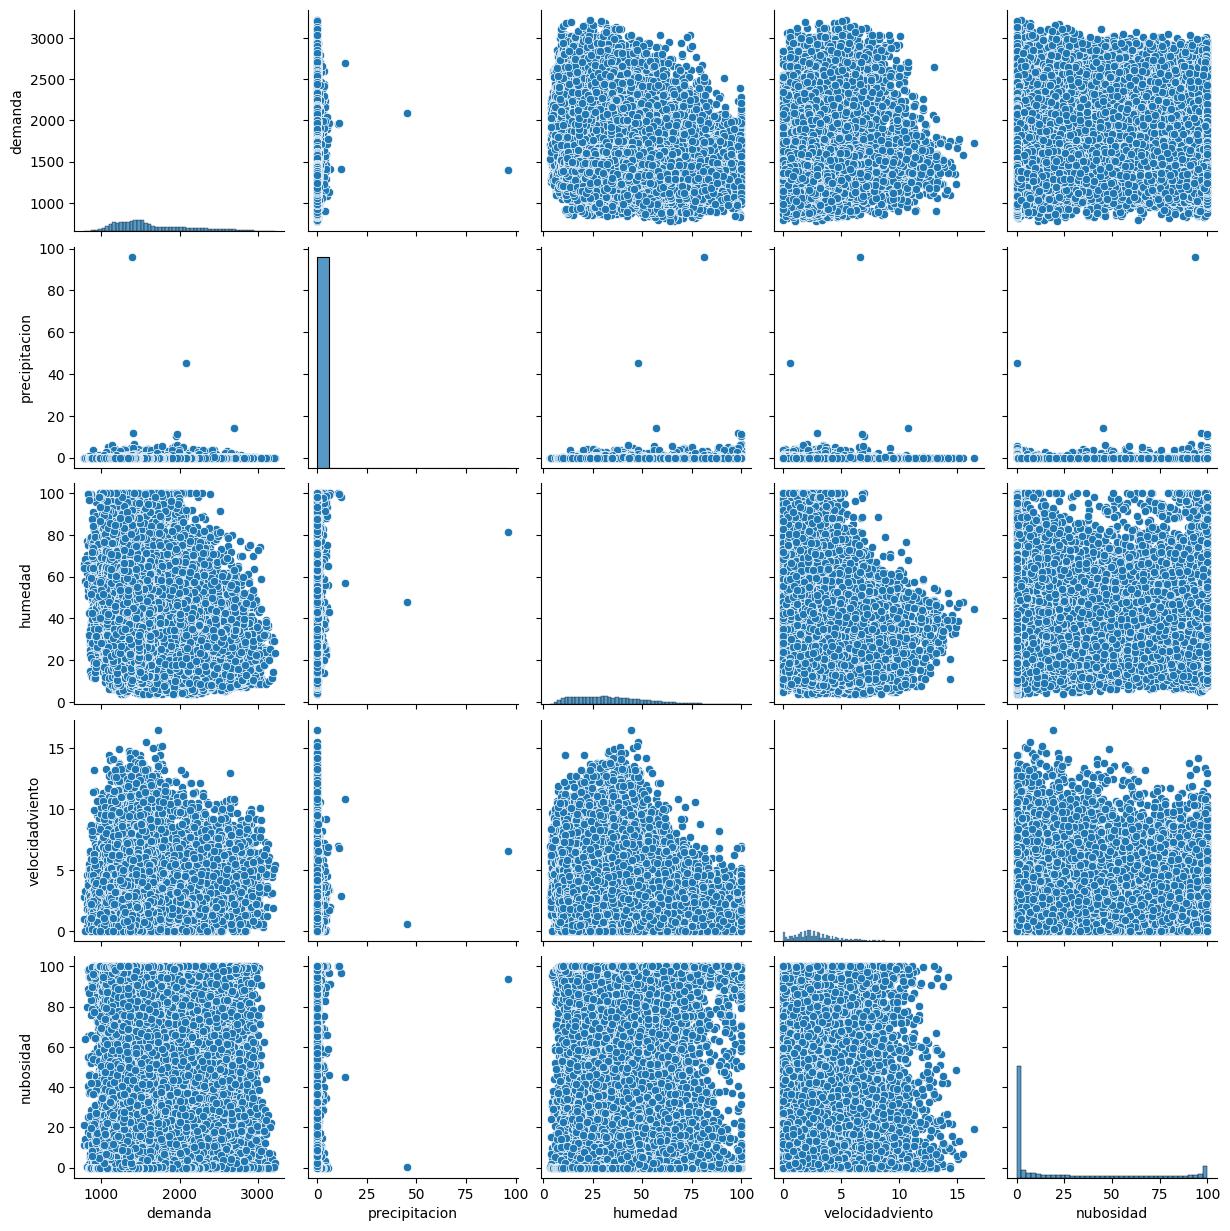

In [156]:
sns.pairplot(df[['demanda', 'temperatura', 'precipitacion', 'humedad', 'velocidadviento', 'nubosidad']])

In [157]:
df[['temperatura']]

,temperatura
0,45
1,44
2,44
3,44
4,45
...,...
26299,60
26300,59
26301,59
26302,58


In [158]:
df.iloc[:, 6] = pd.to_numeric(df.iloc[:, 6], errors ='coerce')

<ipython-input-158-1f85d6c83563>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 6] = pd.to_numeric(df.iloc[:, 6], errors ='coerce')


In [159]:
df.head()

,fecha,dia_semana_num,pandemia,mes,horario_verano,hora,temperatura,precipitacion,humedad,velocidadviento,nubosidad,demanda
0,01/01/2020,3,1,1,0,1,45.0,0.0,62.5,2.8,0.0,979.901252
1,01/01/2020,3,1,1,0,2,44.0,0.0,59.6,2.3,7.9,956.935050
2,01/01/2020,3,1,1,0,3,44.0,0.0,56.4,1.7,16.0,932.884073
3,01/01/2020,3,1,1,0,4,44.0,0.0,57.2,2.4,8.3,910.799446
4,01/01/2020,3,1,1,0,5,45.0,0.0,59.1,3.7,0.2,892.611492


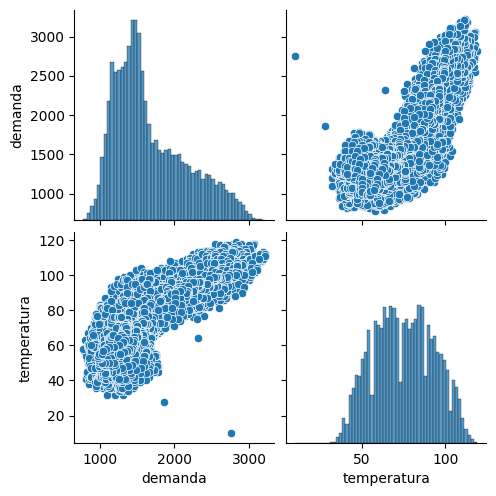

In [160]:
sns.pairplot(df[['demanda', 'temperatura']])

Se grafican las graficas de dispersión e histogramas de fecha vs temperatura

Análisis exploratorio de fecha vs temperatura

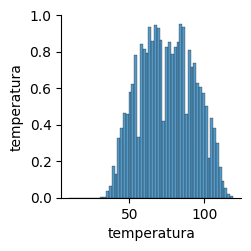

In [161]:
sns.pairplot(df[['fecha', 'temperatura']])

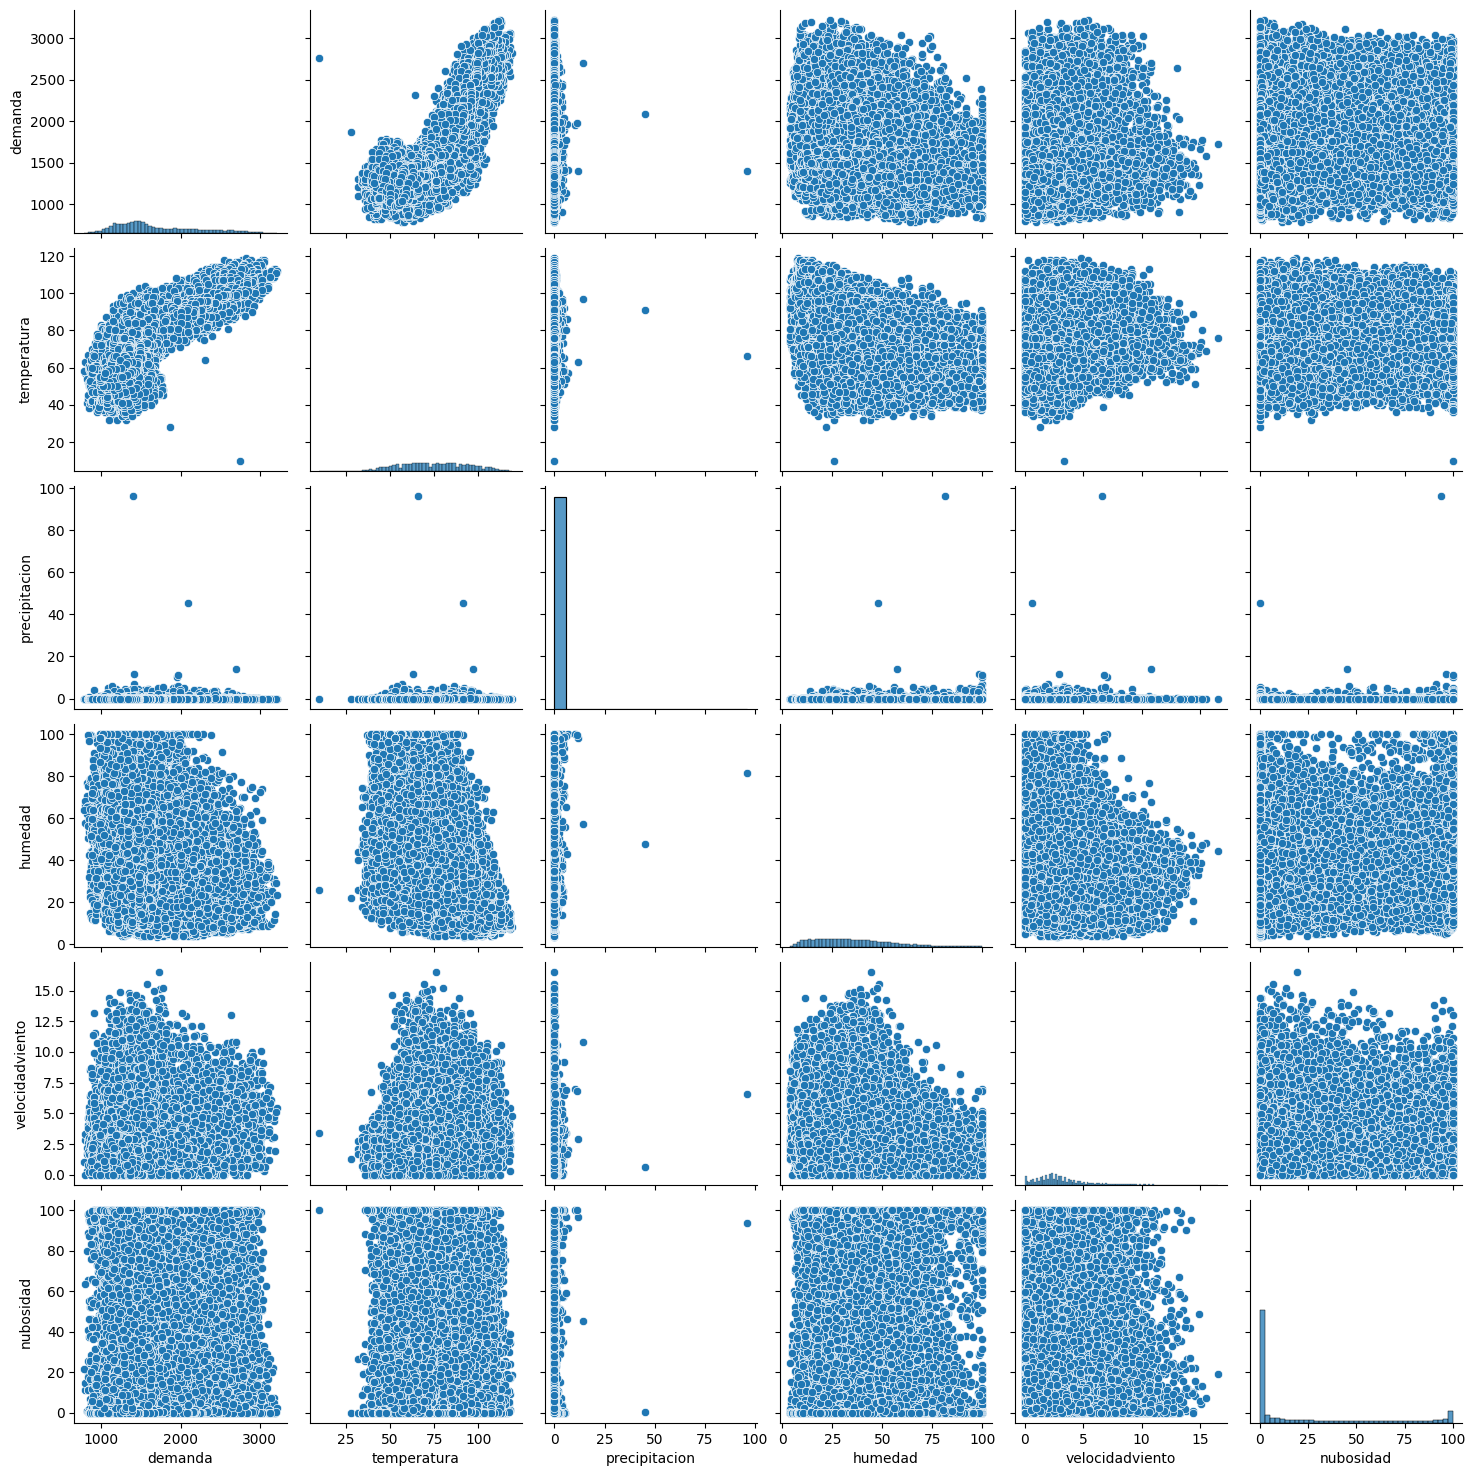

In [162]:
sns.pairplot(df[['demanda', 'temperatura', 'precipitacion', 'humedad', 'velocidadviento', 'nubosidad']])

In [163]:
df_corr = df.corr()

<ipython-input-163-673bd41f6603>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


In [164]:
df_corr['demanda'] >= 0.4

dia_semana_num     False
pandemia           False
mes                False
horario_verano      True
hora               False
temperatura         True
precipitacion      False
humedad            False
velocidadviento    False
nubosidad          False
demanda             True
Name: demanda, dtype: bool

## Selección de variables y datos

Sería conveniente no utilizar los datos de pandemia porque pueden sesgar nuestro análisis al ser una situación extraordinaria.



In [165]:
df_sinpandemia = df[df['pandemia'] == 0]
df_sinpandemia.head()

df_pandemia = df[df['pandemia'] == 1]
df_pandemia.head()

,fecha,dia_semana_num,pandemia,mes,horario_verano,hora,temperatura,precipitacion,humedad,velocidadviento,nubosidad,demanda
0,01/01/2020,3,1,1,0,1,45.0,0.0,62.5,2.8,0.0,979.901252
1,01/01/2020,3,1,1,0,2,44.0,0.0,59.6,2.3,7.9,956.935050
2,01/01/2020,3,1,1,0,3,44.0,0.0,56.4,1.7,16.0,932.884073
3,01/01/2020,3,1,1,0,4,44.0,0.0,57.2,2.4,8.3,910.799446
4,01/01/2020,3,1,1,0,5,45.0,0.0,59.1,3.7,0.2,892.611492


In [166]:
len(df_sinpandemia.values)

12432

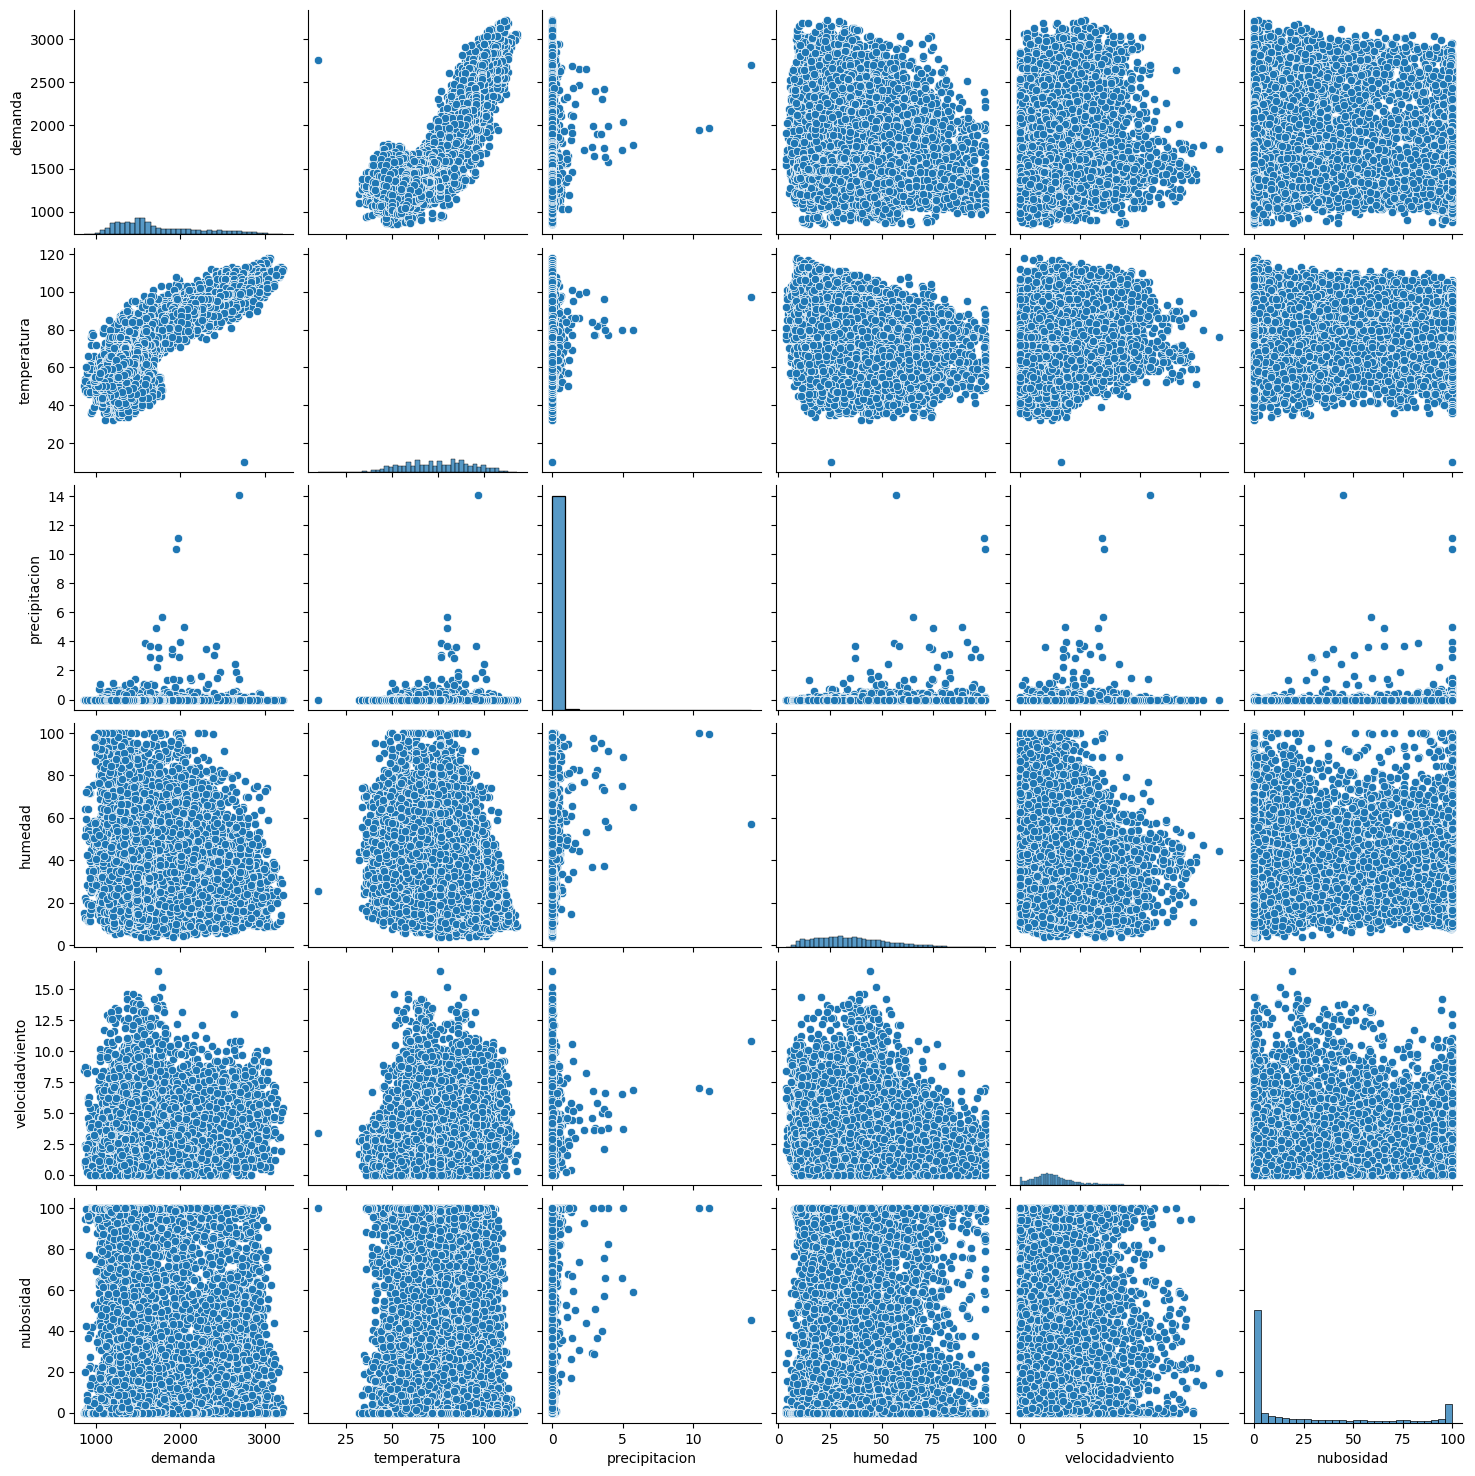

In [167]:
sns.pairplot(df_sinpandemia[['demanda', 'temperatura', 'precipitacion', 'humedad', 'velocidadviento', 'nubosidad']])

In [168]:
df_sinpandemia_corr = df_sinpandemia.corr()
df_sinpandemia_corr['demanda'] >= 0.4

<ipython-input-168-a7cacbd5f6de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sinpandemia_corr = df_sinpandemia.corr()


dia_semana_num     False
pandemia           False
mes                False
horario_verano      True
hora               False
temperatura         True
precipitacion      False
humedad            False
velocidadviento    False
nubosidad          False
demanda             True
Name: demanda, dtype: bool

### Es necesario darle formato a la fecha con pandas

In [169]:
# Para indicar que una columna es tipo fecha en un pd.DataFrame, usar pd.to_datatime
df_sinpandemia["fecha"] = pd.to_datetime(df_sinpandemia["fecha"], format='%d/%m/%Y')
df_pandemia["fecha"] = pd.to_datetime(df_pandemia["fecha"], format='%d/%m/%Y')
df_sinpandemia.head()

<ipython-input-169-73d8f4440be3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinpandemia["fecha"] = pd.to_datetime(df_sinpandemia["fecha"], format='%d/%m/%Y')
<ipython-input-169-73d8f4440be3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandemia["fecha"] = pd.to_datetime(df_pandemia["fecha"], format='%d/%m/%Y')


,fecha,dia_semana_num,pandemia,mes,horario_verano,hora,temperatura,precipitacion,humedad,velocidadviento,nubosidad,demanda
13872,2021-07-31,7,0,8,1,1,88.0,0.0,38.3,2.5,0.0,2078.351697
13873,2021-08-01,7,0,8,1,2,87.0,0.0,39.1,3.1,0.0,1986.910858
13874,2021-08-01,7,0,8,1,3,87.0,0.0,39.7,3.4,0.0,1902.313822
13875,2021-08-01,7,0,8,1,4,86.0,0.0,40.2,2.5,0.0,1842.109536
13876,2021-08-01,7,0,8,1,5,85.0,0.0,36.2,1.0,0.0,1793.675752


In [170]:
df_sinpandemia.index = pd.to_datetime(df_sinpandemia["fecha"], format='%d/%m/%Y')
df_pandemia.index = pd.to_datetime(df_pandemia['fecha'], format='%d/%m/%Y')
df_sinpandemia.head()

,fecha,dia_semana_num,pandemia,mes,horario_verano,hora,temperatura,precipitacion,humedad,velocidadviento,nubosidad,demanda
fecha,,,,,,,,,,,,
2021-07-31,2021-07-31,7,0,8,1,1,88.0,0.0,38.3,2.5,0.0,2078.351697
2021-08-01,2021-08-01,7,0,8,1,2,87.0,0.0,39.1,3.1,0.0,1986.910858
2021-08-01,2021-08-01,7,0,8,1,3,87.0,0.0,39.7,3.4,0.0,1902.313822
2021-08-01,2021-08-01,7,0,8,1,4,86.0,0.0,40.2,2.5,0.0,1842.109536
2021-08-01,2021-08-01,7,0,8,1,5,85.0,0.0,36.2,1.0,0.0,1793.675752


In [171]:
type(df_sinpandemia['fecha'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [172]:
df_sinpandemia['fecha'][0]

Timestamp('2021-07-31 00:00:00')

In [173]:
df_sinpandemia['fecha'][0].year

2021

<Axes: xlabel='fecha'>

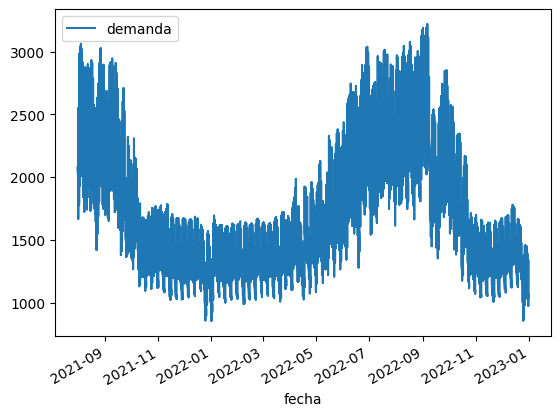

In [174]:
df_sinpandemia[['demanda']].plot()

<Axes: xlabel='fecha'>

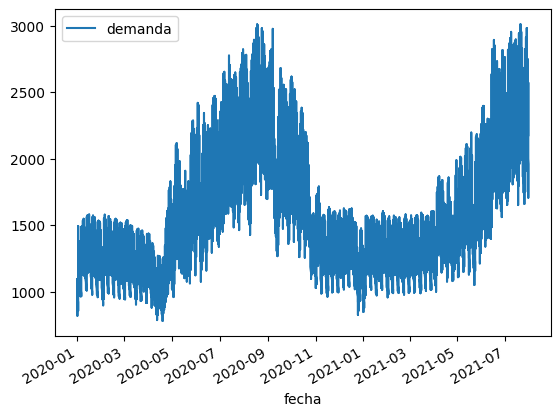

In [175]:
df_pandemia[['demanda']].plot()

In [176]:
np.min(df_pandemia[['demanda']]), np.mean(df_pandemia[['demanda']])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(demanda    779.578252
 dtype: float64,
 demanda    1608.469751
 dtype: float64)

In [177]:
np.min(df_sinpandemia[['demanda']]), np.mean(df_sinpandemia[['demanda']])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(demanda    857.403342
 dtype: float64,
 demanda    1746.318528
 dtype: float64)

## Parece que podemos confiar en los datos

### ¿Qué problema queremos resolver? ¿nos conviene usar regresión, clasificación o clustering?

Virginia: Regresión, hay variables numéricas. Considerando que la temperatura tiene correlación con la demanda.

Variable a predecir: Demanda

Variables de entrada: Todas, excepto pandemia



In [178]:
# df_sinpandemia['anio'] = df_sinpandemia["fecha"].dt.year

In [179]:
# df_sinpandemia.head()

In [180]:
df_sinpandemia = df_sinpandemia[['dia_semana_num', 'mes', 'horario_verano', 'hora', 'demanda', 	'temperatura', 'precipitacion', 	'humedad', 	'velocidadviento', 	'nubosidad']]
df_sinpandemia.head()

,dia_semana_num,mes,horario_verano,hora,demanda,temperatura,precipitacion,humedad,velocidadviento,nubosidad
fecha,,,,,,,,,,
2021-07-31,7,8,1,1,2078.351697,88.0,0.0,38.3,2.5,0.0
2021-08-01,7,8,1,2,1986.910858,87.0,0.0,39.1,3.1,0.0
2021-08-01,7,8,1,3,1902.313822,87.0,0.0,39.7,3.4,0.0
2021-08-01,7,8,1,4,1842.109536,86.0,0.0,40.2,2.5,0.0
2021-08-01,7,8,1,5,1793.675752,85.0,0.0,36.2,1.0,0.0


In [181]:
df_sinpandemia.values

array([[ 7. ,  8. ,  1. , ..., 38.3,  2.5,  0. ],
       [ 7. ,  8. ,  1. , ..., 39.1,  3.1,  0. ],
       [ 7. ,  8. ,  1. , ..., 39.7,  3.4,  0. ],
       ...,
       [ 6. , 12. ,  0. , ...,  nan,  nan,  nan],
       [ 6. , 12. ,  0. , ...,  nan,  nan,  nan],
       [ 6. , 12. ,  0. , ...,  nan,  nan,  nan]])

In [182]:
nfilas, ncols = np.shape(df_sinpandemia.values)
nfilas, ncols

(12432, 10)

In [183]:
ntot_entradas = nfilas * ncols

In [184]:
print("{:2f} % de Nans".format((np.isnan(df_sinpandemia.values).sum()/ntot_entradas)*100))

0.296815 % de Nans


In [185]:
# Contar los valores NaN en cada columna
nan_count = df_sinpandemia.isna().sum()
print(nan_count)


dia_semana_num       0
mes                  0
horario_verano       0
hora                 0
demanda              1
temperatura        344
precipitacion        6
humedad              6
velocidadviento      6
nubosidad            6
dtype: int64


In [186]:
# Contar los valores NaN en cada columna (porcentaje)
nan_count = (df_sinpandemia.isna().sum()/nfilas)*100
print(nan_count)

dia_semana_num     0.000000
mes                0.000000
horario_verano     0.000000
hora               0.000000
demanda            0.008044
temperatura        2.767053
precipitacion      0.048263
humedad            0.048263
velocidadviento    0.048263
nubosidad          0.048263
dtype: float64


In [187]:
df_sinpandemia['temperatura']

fecha
2021-07-31    88.0
2021-08-01    87.0
2021-08-01    87.0
2021-08-01    86.0
2021-08-01    85.0
              ... 
2022-12-31    60.0
2022-12-31    59.0
2022-12-31    59.0
2022-12-31    58.0
2022-12-31    57.0
Name: temperatura, Length: 12432, dtype: float64

In [188]:
from sklearn.impute import SimpleImputer

In [189]:
np.shape(df_sinpandemia['temperatura'].values.reshape(-1, 1))

(12432, 1)

In [190]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_sinpandemia['temperatura'].values.reshape(-1, 1))
df_sinpandemia['temperatura'] = imp.transform(df_sinpandemia['temperatura'].values.reshape(-1, 1))

In [191]:
imp.fit(df_sinpandemia['demanda'].values.reshape(-1, 1))
df_sinpandemia['demanda'] = imp.transform(df_sinpandemia['demanda'].values.reshape(-1, 1))

imp.fit(df_sinpandemia['precipitacion'].values.reshape(-1, 1))
df_sinpandemia['precipitacion'] = imp.transform(df_sinpandemia['precipitacion'].values.reshape(-1, 1))

imp.fit(df_sinpandemia['humedad'].values.reshape(-1, 1))
df_sinpandemia['humedad'] = imp.transform(df_sinpandemia['humedad'].values.reshape(-1, 1))

imp.fit(df_sinpandemia['velocidadviento'].values.reshape(-1, 1))
df_sinpandemia['velocidadviento'] = imp.transform(df_sinpandemia['velocidadviento'].values.reshape(-1, 1))

imp.fit(df_sinpandemia['nubosidad'].values.reshape(-1, 1))
df_sinpandemia['nubosidad'] = imp.transform(df_sinpandemia['nubosidad'].values.reshape(-1, 1))

In [192]:
# Contar los valores NaN en cada columna
nan_count = df_sinpandemia.isna().sum()
print(nan_count)

dia_semana_num     0
mes                0
horario_verano     0
hora               0
demanda            0
temperatura        0
precipitacion      0
humedad            0
velocidadviento    0
nubosidad          0
dtype: int64


Una vez listo nuestro conjunto de datos, es necesario estandarizar nuestras variables y generar conjuntos de entrenamiento, validacion y prueba (test).

In [193]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [146]:
# scaler = MinMaxScaler(feature_range=(-1,1))
# scaler.fit(df_sinpandemia.values)

In [147]:
# df_sinpandemia_sc = scaler.transform(df_sinpandemia.values)

In [148]:
# df_sinpandemia_sc

In [194]:
data_train, data_test = train_test_split(df_sinpandemia, train_size=0.8, shuffle=True)
data_val, data_test = train_test_split(data_test, train_size=0.5, shuffle=True)

In [195]:
np.shape(data_train), np.shape(data_test), np.shape(data_val)

((9945, 10), (1244, 10), (1243, 10))

In [198]:
data_train

,dia_semana_num,mes,horario_verano,hora,demanda,temperatura,precipitacion,humedad,velocidadviento,nubosidad
fecha,,,,,,,,,,
2022-08-29,1,8,1,5,1809.178646,84.0,0.00,66.3,2.7,0.0
2022-10-11,2,10,1,19,2210.672859,90.0,0.00,50.3,3.9,5.2
2022-09-17,6,9,1,15,2115.008365,97.0,0.00,20.8,2.5,0.0
2022-10-16,7,10,1,9,1239.397501,68.0,0.00,57.5,1.8,15.2
2021-12-19,7,12,0,20,1406.545677,52.0,0.00,63.9,1.7,10.7
...,...,...,...,...,...,...,...,...,...,...
2022-10-17,1,10,1,20,1976.555103,80.0,0.00,67.7,1.0,0.0
2021-08-18,3,8,1,15,2761.353312,101.0,0.00,26.1,7.8,0.6
2022-02-22,2,2,0,17,1566.273860,61.0,0.00,52.5,5.5,72.4


Separar X (variables independientes) y Y (variable a predecir)

In [200]:
X_train = data_train.values[:, :-1]
X_test = data_test.values[:, :-1]
X_val = data_val.values[:, :-1]

Y_train = data_train.values[:, -1]
Y_test = data_test.values[:, -1]
Y_val = data_val.values[:, -1]

In [201]:
np.shape(X_train), np.shape(Y_train)

((9945, 9), (9945,))

ya podemos diseñar nuestra red neuronal

In [202]:
import tensorflow.keras as K
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model

In [203]:
# Red neuronal
model = Sequential()

# n_input debe coincidir con el número de variables independientes,
# atributos o columnas.
n_input = 9
###### Para el tercer caso n_input = 3
# n_input = 3
hidden_1 = 100
hidden_2 = 100
hidden_3 = 100
# n_output debe coincidir con el número de variables
# dependientes o etiquetas o clases.
n_output = 1

# Input layer and first hidden layer.
# La primer linea es la única que requiere el input_dim y nos incluye
# la capa de entrada y la primera capa oculta.
model.add(K.layers.Dense(hidden_1, input_dim=n_input, activation='relu'))
# Hidden layers
model.add(K.layers.Dense(hidden_2, activation='relu'))
model.add(K.layers.Dense(hidden_3, activation='relu'))


# Output layer
model.add(K.layers.Dense(n_output, activation='linear'))

optimizer = K.optimizers.Adam(learning_rate=0.0001)

# Se compila el modelo, eligiendo Optimizador y Función de pérdida.
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1000      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21301 (83.21 KB)
Trainable params: 21301 (83.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [204]:
epochs = 10
bs = 16

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                    epochs=epochs, batch_size=bs)

Epoch 1/10
622/622 [==============================] - 5s 4ms/step - loss: 1290.8462 - val_loss: 1189.4198
Epoch 2/10
622/622 [==============================] - 2s 3ms/step - loss: 1272.4897 - val_loss: 1123.3627
Epoch 3/10
622/622 [==============================] - 2s 3ms/step - loss: 1249.3098 - val_loss: 1129.9723
Epoch 4/10
622/622 [==============================] - 2s 3ms/step - loss: 1252.6260 - val_loss: 1182.5286
Epoch 5/10
622/622 [==============================] - 2s 3ms/step - loss: 1245.9222 - val_loss: 1117.7056
Epoch 6/10
622/622 [==============================] - 5s 8ms/step - loss: 1234.1503 - val_loss: 1105.1304
Epoch 7/10
622/622 [==============================] - 3s 5ms/step - loss: 1235.5815 - val_loss: 1176.5375
Epoch 8/10
622/622 [==============================] - 3s 4ms/step - loss: 1241.9230 - val_loss: 1148.3724
Epoch 9/10
622/622 [==============================] - 2s 3ms/step - loss: 1238.0079 - val_loss: 1101.9520
Epoch 10/10
622/622 [=========================

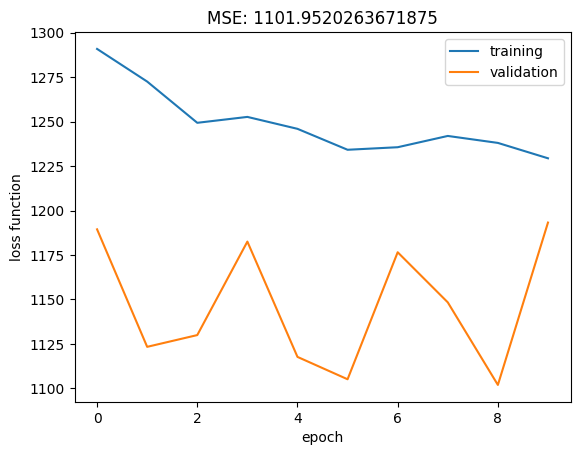

In [205]:
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
mse = np.min(history.history['val_loss'])
plt.title('MSE: {}'.format(mse))
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')

In [206]:
# Aplicar una metrica de regresion

In [207]:
from sklearn.metrics import mean_squared_error

In [208]:
predicciones_Y = model.predict(X_test)

39/39 [==============================] - 0s 2ms/step


In [209]:
mean_squared_error(Y_test, predicciones_Y)

1195.900368889767

Imaginemos que se toma una nueva medicion con valores nuevos de nuestros 10 atributos considerados:

[dia_semana_num 	mes 	horario_verano 	hora 	demanda 	temperatura 	precipitacion 	humedad 	velocidadviento 	nubosidad 	anio]

- Hay que usar el modelo entrenado para predecir la demanda.

In [211]:
dato_nuevo = np.array([7, 8, 1, 1, 88.0, 0.0, 38.3, 2.5, 0.0])

In [215]:
nueva_prediccion = model.predict(dato_nuevo.reshape(1,-1))
nueva_prediccion

1/1 [==============================] - 0s 34ms/step


array([[19.63745]], dtype=float32)